In [1]:
import matplotlib.pyplot as plt

# API 1: Indexing

cpu
checkpoint directory created: ./model
saving model version 0.0


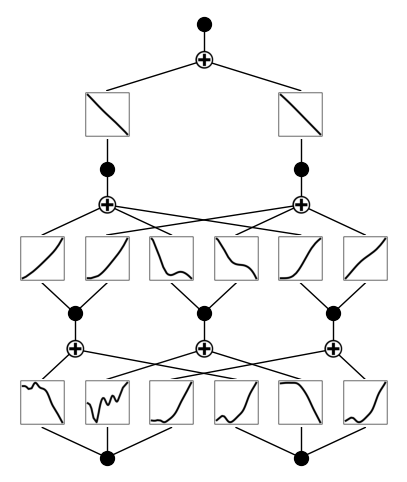

In [2]:
from kan import *

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

model = KAN(width=[2,3,2,1], noise_scale=0.3, device=device)
x = torch.normal(0,1,size=(100,2)).to(device)
model(x);
beta = 100
model.plot(beta=beta)
# [2,3,2,1] means 
# 2 input nodes
# 3 neurons in the first hidden layer,
# 2 neurons in the second hidden layer,
# 1 output node

# beta controls the transparency of the img of each fucntion

### Indexing of edges (activation functions)

Each activation function is indexed by $(l,i,j)$ where $l$ is the layer index, $i$ is the input neuron index, $j$ is the output neuron index. All of them starts from 0. For example, the one in the bottom left corner is (0, 0, 0). Let's try to make it symbolic and see it turns red.

r2 is 0.9488635063171387
saving model version 0.1
saving model version 0.2


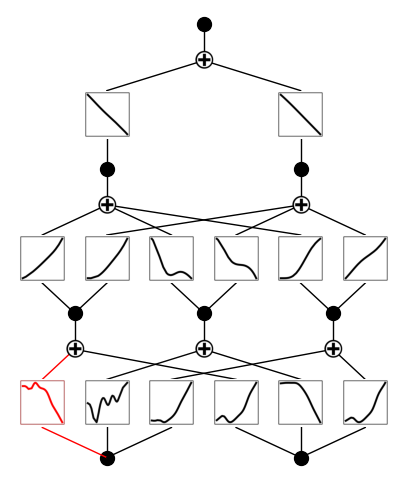

In [3]:
model.fix_symbolic(0,0,0,'sin')
model.plot(beta=beta)
model.unfix_symbolic(0,0,0)

# fix_symbolic will save the model and each figures of activation.
# Once the new model is retrained and save, model will replace the original saved model because the file name is the same.
# fix_symbolic and unfix_symbolic will be saved as different models.

r2 is 0.4213516116142273
r2 is not very high, please double check if you are choosing the correct symbolic function.
saving model version 0.3
saving model version 0.4


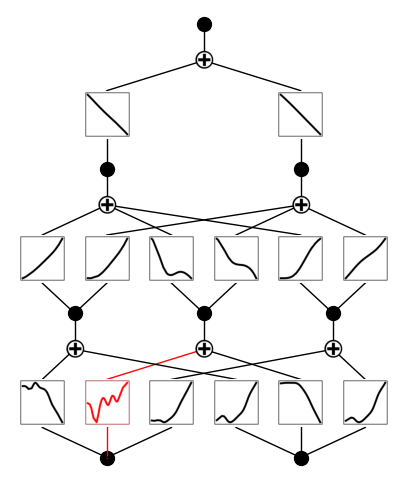

In [4]:
model.fix_symbolic(0,0,1,'sin')
model.plot(beta=beta)
model.unfix_symbolic(0,0,1)

r2 is 0.9719710350036621
saving model version 0.5
saving model version 0.6


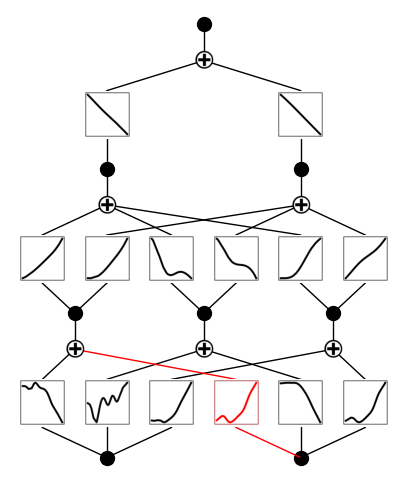

In [5]:
model.fix_symbolic(0,1,0,'sin')
model.plot(beta=beta)
model.unfix_symbolic(0,1,0)

r2 is 0.9981090426445007
saving model version 0.7
saving model version 0.8


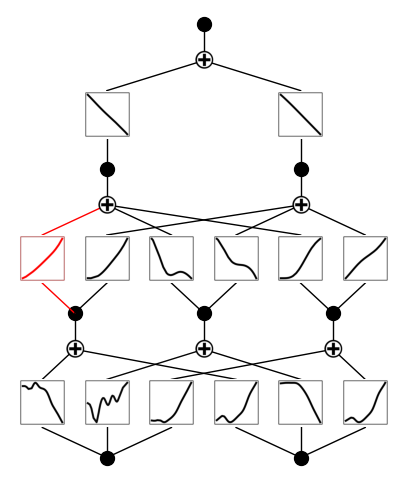

In [6]:
model.fix_symbolic(1,0,0,'sin')
model.plot(beta=beta)
model.unfix_symbolic(1,0,0)

r2 is 0.99980628490448
saving model version 0.9
saving model version 0.10


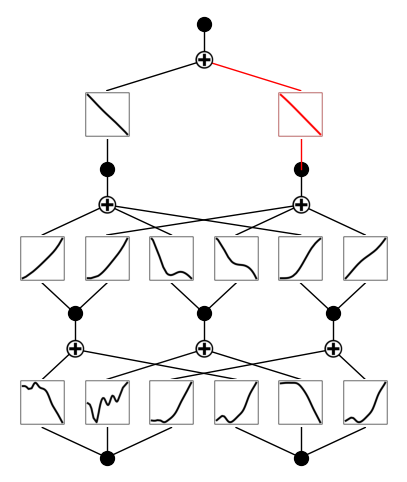

In [7]:
model.fix_symbolic(2,1,0,'sin')
model.plot(beta=beta)
model.unfix_symbolic(2,1,0)

### Indexing of nodes (neurons)

Each neuron (node) is indexed by $(l,i)$ where $l$ is the layer index along depth, $i$ is the neuron index along width. In the function remove_node, we use use $(l,i)$ to indicate which node we want to remove.

In [8]:
model.remove_node(1,0)

saving model version 0.11
saving model version 0.12
saving model version 0.13


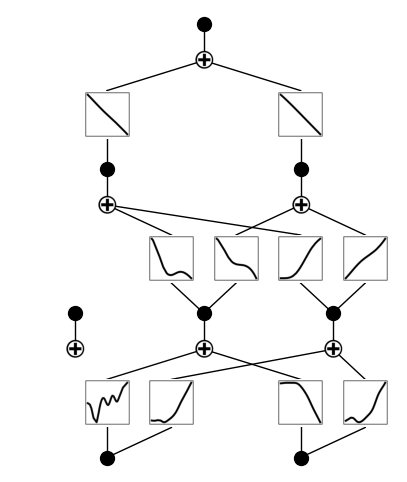

In [9]:
model.plot(beta=beta)

In [10]:
model.remove_node(2,1)

saving model version 0.14
saving model version 0.15
saving model version 0.16


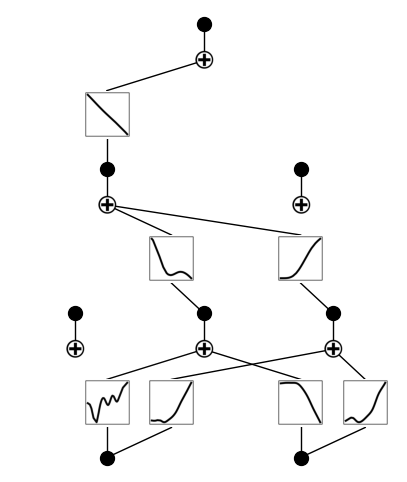

In [11]:
model.plot(beta=beta)

In [12]:
model.remove_node(1,2)

saving model version 0.17
saving model version 0.18
saving model version 0.19


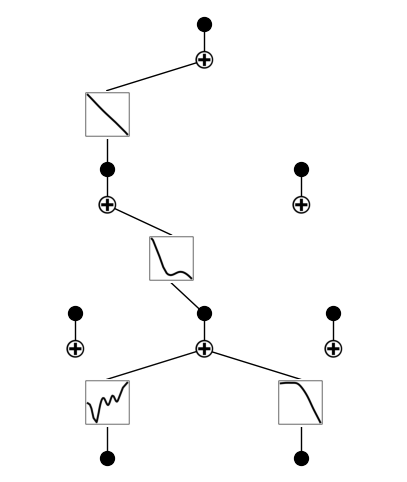

In [13]:
model.plot(beta=beta)

### Indexing of layers

In [14]:
# KAN spline layers are refererred to as act_fun
# KAN symbolic layers are referred to as symbolic_fun

model = KAN(width=[2,3,5,1])

i = 0
model.act_fun[i] # => KAN Layer (Spline)
model.symbolic_fun[i] # => KAN Layer (Symbolic)

for i in range(3):
    print(model.act_fun[i].in_dim, model.act_fun[i].out_dim)
    print(model.symbolic_fun[i].in_dim, model.symbolic_fun[i].out_dim)

checkpoint directory created: ./model
saving model version 0.0
2 3
2 3
3 5
3 5
5 1
5 1


In [15]:
# check model parameters
model.act_fun[i].grid
model.act_fun[i].coef
model.symbolic_fun[i].funs_name
model.symbolic_fun[i].mask

Parameter containing:
tensor([[0., 0., 0., 0., 0.]])